# KERAS WAVELETS TEST

In [6]:
import os
import numpy as np
import mne
from mne.datasets import sample
from sklearn.model_selection import train_test_split
from openneuro import download
from autoreject import get_rejection_threshold

/Users/evakhromeeva/Projects/BeSMPSegmentation/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Расположение данных
dataset_path = '/Users/evakhromeeva/mne_data/ds002778'

In [8]:
# Параметры датасета
dataset = "ds002778"
subjects_pd = ["sub-pd3", "sub-pd5", "sub-pd6", "sub-pd6", "sub-pd9","sub-pd11", "sub-pd12", "sub-pd13", "sub-pd14", "sub-pd16", "sub-pd17", "sub-pd19", "sub-pd22", "sub-pd23", "sub-pd26", "sub-pd28"]# subject with PD
subjects_hc = ["sub-hc1", "sub-hc2", "sub-hc4", "sub-hc7", "sub-hc8", "sub-hc10", "sub-hc18", "sub-hc20", "sub-hc21", "sub-hc24", "sub-hc25", "sub-hc29", "sub-hc30", "sub-hc31", "sub-hc32", "sub-hc33"] # healthy subject

In [9]:
# путь до файла с ЭЭГ выбранного пациента (например, sub-pd6)
def get_eeg_data_path(sub):
    return f'{dataset_path}/{sub}/ses-off/eeg/{sub}_ses-off_task-rest_eeg.bdf' if sub.startswith('sub-pd') else f'{dataset_path}/{sub}/ses-hc/eeg/{sub}_ses-hc_task-rest_eeg.bdf'

In [10]:
# Загрузка и предобработка данных
def load_and_preprocess_data(data_list, is_healthy=True, duration=2.0):
    raw_files = [get_eeg_data_path(f) for f in data_list]
    epochs_list = []
    labels = []

    for raw_file in raw_files:
        raw = mne.io.read_raw_bdf(raw_file, preload=True)
        raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4','EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']) #drop extra channels
        raw.set_eeg_reference(ref_channels='average')
        raw.filter(0.5, None, fir_design='firwin',phase='zero-double') #remove drifts
        event_id = {'healthy': 0, 'parkinson': 1}
        epochs = mne.make_fixed_length_epochs(raw, duration=duration, preload=False, proj=True)
        reject = get_rejection_threshold(epochs)
        epochs.drop_bad(reject=reject)
        epochs_list.append(epochs)
        labels.extend([event_id['healthy'] if is_healthy else event_id['parkinson']] * len(epochs))

    epochs_data = np.concatenate([e.get_data() for e in epochs_list])
    labels = np.array(labels)
    return epochs_data, labels

In [11]:
# Основной пайплайн
X_pd, y_pd = load_and_preprocess_data(subjects_pd, is_healthy=False)
X_hc, y_hc = load_and_preprocess_data(subjects_hc, is_healthy=True)

Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 100 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP5', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
9 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 98 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC6', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F4', 'AF4', 'Fp2', 'Fz']
 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 95 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 95 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 95 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1'

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 93 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T8', 'F8', 'AF4', 'Fp2']
13 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd12/ses-off/eeg/sub-pd12_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info st

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 103 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
9 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 93 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd14/ses-off/eeg/sub-pd14_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149503  =      0.000 ...   291.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
146 matching events found
No 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 146 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['CP6', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T8', 'FC6', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 94 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'C3', 'CP5', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'P3', 'CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F7', 'FC5']
    Rejecting  epoch based on EEG : ['Fp2']
    Reject

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 94 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'O1', 'Oz', 'O2', 'P8', 'T8', 'FC2', 'Fp2', 'Cz']
    Rejecting  epoc

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 92 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP6', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'CP5', 'CP6', 'T8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'CP6', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T8', 'FC6', 'F8']
    Rejecting  epoch base

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 94 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 102 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['P8', 'T8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['FC5', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC5', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'T8']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['Fp2']
    Reje

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 95 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'F8']
    Rejecting  epoch based on EEG : ['FC5', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC5', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'T8', 'FC6', 'F8', 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 103 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejectin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 96 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG :

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 97 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC6', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T8', 'FC6', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 90 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
96 matching events found
No baseli

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 96 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T8', 'AF4', 'Fp2']
    Re

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 95 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
9 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102911  =      0.000 ...   200.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EE

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 100 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC2', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'CP6', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 93 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'O1', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejectin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 92 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
94 matching events found
No base

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 94 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 96 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Reje

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 101 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 101887  =      0.000 ...   198.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
99 matching events found
No ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 99 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 94 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 93 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'Fp2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'O1', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'O1', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'O1', 'P8', 'CP6', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'O1', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP5', 'CP6', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 98 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'T7', 'O2', 'PO4', 'P8', 'T8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
12 bad epochs dropped
Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc33/ses-hc/eeg/sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structu

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using data from preloaded Raw for 95 events and 1024 original time points ...
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'F8', 'Fp2']
3 bad epochs dropped
Using data from preloaded Raw for 58 events and 1024 original time points ...
Using data from preloaded Raw for 20 events and 1024 original time points ...
Using data from preloaded Raw for 90 events and 1024 original time points ...
Using data from preloaded Raw for 77 events and 1024 original time points ...
Using data from preloaded Raw for 86 events and 1024 original time points ...
Using data from preloaded Raw for 61 events and 1024 original time points ...
Using data from preloaded Raw for 75 events and 1024 original time points ...
Using data from preloaded Raw for 92 events and 1024 original time points ...
Using data from preloaded Raw for 38 events and 1024 original time points ...
Using data from preloa

In [12]:
# Объединение данных больных и здоровых в единый тензор

X = np.concatenate((X_pd, X_hc), axis=0)
y = np.concatenate((y_pd, y_hc), axis=0)
print(X.shape)
print(y.shape)

(2263, 32, 1024)
(2263,)


In [13]:
import pywt

def apply_wavelet_transform(data, wavelet='db4', levels=4):
    """
    Применяет вейвлет-преобразование к данным ЭЭГ.
    
    Параметры:
    - data: numpy array, размерность (n_samples, 32, 1024)
    - wavelet: тип вейвлета (по умолчанию 'db4')
    - levels: количество уровней декомпозиции (по умолчанию 4)
    
    Возвращает:
    - transformed_data: numpy array, размерность (n_samples, 32, n_coeffs)
      где n_coeffs — общее количество коэффициентов после вейвлет-преобразования.
    """
    transformed_data = []
    
    for sample in data:  # Проходим по каждому примеру
        sample_coeffs = []
        
        for channel in sample:  # Проходим по каждому каналу
            # Применяем вейвлет-преобразование
            coeffs = pywt.wavedec(channel, wavelet, level=levels)
            
            # Объединяем коэффициенты всех уровней в один массив
            flat_coeffs = np.concatenate(coeffs)
            
            # Если длина коэффициентов больше 1024, обрезаем
            if len(flat_coeffs) > 1024:
                flat_coeffs = flat_coeffs[:1024]
            # Если меньше, дополняем нулями
            elif len(flat_coeffs) < 1024:
                flat_coeffs = np.pad(flat_coeffs, (0, 1024 - len(flat_coeffs)), mode='constant')
            
            sample_coeffs.append(flat_coeffs)
        
        transformed_data.append(sample_coeffs)
    
    return np.array(transformed_data)

In [14]:
from sklearn.preprocessing import StandardScaler

def normalize_eeg_data(data):
    """
    Нормализует данные ЭЭГ по каждому каналу.
    
    Параметры:
    - data: numpy array, размерность (n_samples, 32, 1024)
    
    Возвращает:
    - normalized_data: numpy array, размерность (n_samples, 32, 1024)
    """
    n_samples, n_channels, n_times = data.shape
    normalized_data = np.zeros_like(data)
    
    for sample in range(n_samples):  # Проходим по каждому примеру
        for channel in range(n_channels):  # Проходим по каждому каналу
            # Нормализуем данные канала
            scaler = StandardScaler()
            normalized_data[sample, channel, :] = scaler.fit_transform(
                data[sample, channel, :].reshape(-1, 1)
            ).flatten()
    
    return normalized_data

In [15]:
X_normalized = normalize_eeg_data(X)

In [16]:
# Предобрабатываем входные данные

X_transformed = apply_wavelet_transform(X_normalized, wavelet='db4', levels=4)

In [17]:

print(X_transformed.shape) 

(2263, 32, 1024)


In [18]:
# Разделение на тренировочную и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
# построение модели

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(32, 1024)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Для бинарной классификации

/Users/evakhromeeva/Projects/BeSMPSegmentation/.conda/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Компиляция модели

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Обучение модели

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5438 - loss: 0.8077 - val_accuracy: 0.5635 - val_loss: 0.6828
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6962 - loss: 0.5866 - val_accuracy: 0.5746 - val_loss: 0.6817
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8681 - loss: 0.3595 - val_accuracy: 0.5691 - val_loss: 0.9375
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9158 - loss: 0.2056 - val_accuracy: 0.5939 - val_loss: 1.0218
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9762 - loss: 0.0775 - val_accuracy: 0.6160 - val_loss: 1.1039
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9979 - loss: 0.0251 - val_accuracy: 0.6160 - val_loss: 1.3758
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9913 - loss: 0.0206 - val_accuracy: 0.5912 - val_loss: 1.4218
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9959 - loss: 0.0154 - val_accuracy: 0.6077 - val_loss

In [22]:
# Оценка на тестовой выборке

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6272 - loss: 2.3677 
Test accuracy: 0.620309054851532


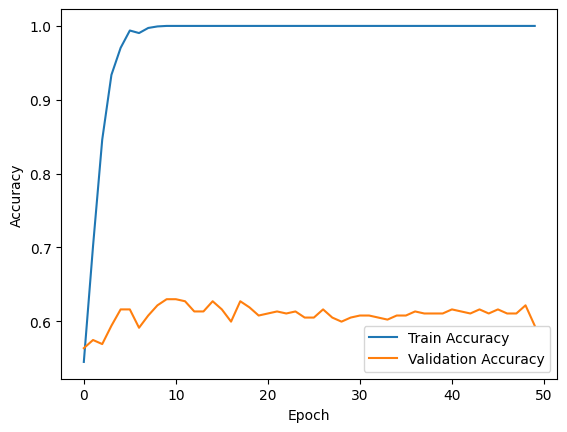

In [23]:
# Анализ результатов

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
from datetime import datetime
current_datetime = datetime.now().isoformat(sep='T')
print(current_datetime)

model.save(f'./models/wavelets-db4-${current_datetime}.keras')

2025-03-11T21:53:25.949167
